##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Overfit and underfit -- NW Q: do we ned this? 

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/overfit_and_underfit"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

As always, the code in this example will use the `tf.keras` API, which you can learn more about in the TensorFlow [Keras guide](https://www.tensorflow.org/guide/keras).

In both of the previous examples—[classifying text](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub) and [predicting fuel efficiency](https://www.tensorflow.org/tutorials/keras/regression) — we saw that the accuracy of our model on the validation data would peak after training for a number of epochs, and would then stagnate or start decreasing.

In other words, our model would *overfit* to the training data. Learning how to deal with overfitting is important. Although it's often possible to achieve high accuracy on the *training set*, what we really want is to develop models that generalize well to a *testing set* (or data they haven't seen before).

The opposite of overfitting is *underfitting*. Underfitting occurs when there is still room for improvement on the test data. This can happen for a number of reasons: If the model is not powerful enough, is over-regularized, or has simply not been trained long enough. This means the network has not learned the relevant patterns in the training data.

If you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data. We need to strike a balance. Understanding how to train for an appropriate number of epochs as we'll explore below is a useful skill.

To prevent overfitting, the best solution is to use more complete training data. The dataset should cover the full range of inputs that the model is expected to handle. Additional data may only be useful if it covers new and interesting cases.

A model trained on more complete data will naturally generalize better. When that is no longer possible, the next best solution is to use techniques like regularization. These place constraints on the quantity and type of information your model can store.  If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

In this notebook, we'll explore several common regularization techniques, and use them to improve on a classification model.

# Case 6: 
Steven Hayden, Kevin Mendonsa, Joe Schueder, Nicole Wittlin  

## Introduction 

## Data Preparation and Exploratory Analysis

**NW Q: what else do we need here? Most of this was pulled from the case, what from the notebook below do we need to highlight? Any key packages? Etc. 
SH: we did not really do any data exploration. We changed how the data was imported from a tensor to a df. This made it more readable. This could have a negative impact on perform. 

For example, though the Large Hadron Collider produces approximately 10^11 collisions per hour, approximately 300 of these collisions result in a Higgs boson, on average. Therefore, good data analysis depends on distinguishing collisions which produce particles of interest (signal) from those producing other particles (background).

The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes.

Published dataset containing 11 million simulated collision events for benchmarking ML classification algorithms, found on UCI Machine Learning Repository

Data sets were nearly balanced with 53% positive examples in Higgs data 

https://www.tensorflow.org/datasets/catalog/higgs

### Package Set Up

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.1.0


In [4]:
#!pip install -q git+https://github.com/tensorflow/docs
#!pip install git+https://github.com/tensorflow/docs


In [5]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [6]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile


In [7]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

### Data Set Analysis

In [8]:
#gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz')
#gz = 'C:/Users/kevinm/Documents/SMU/MSDS7337_NaturalLanguageProcessing/Week11/HIGGS.csv.gz'
#gz = 'C:/Users/shayden/Downloads/HIGGS.csv.gz'
#gz = tf.keras.utils.get_file('HIGGS.csv.gz', '/home/jjschued/HIGGS.csv')

In [9]:
import os
proxy = 'http://proxy.rockwellcollins.com:9090'
os.environ['http_proxy'] = proxy
os.environ['https_proxy'] = proxy
os.environ['HTTP_PROXY'] = proxy
os.environ['HTTPS_PROXY'] = proxy

In [10]:
import pandas as pd
import requests
from io import StringIO

In [11]:
#https://drive.google.com/file/d/17vHho4WOidi1xsU5nuYIxvgaxKTK2L75/view?usp=sharing
file_id = '17vHho4WOidi1xsU5nuYIxvgaxKTK2L75'
#url_dataset = 'https://drive.google.com/uc?export=download&id=' + file_id
#url_dataset = '/user/jjschued/HIGGS.csv'
#url_dataset = 'https://drive.google.com/u/1/uc?export=download&confirm=cg02&id=17vHho4WOidi1xsU5nuYIxvgaxKTK2L75'
#url_dataset = "https://doc-0g-4c-docs.googleusercontent.com/docs/securesc/aplji487l37jpmjrtc3fc7mkdck4ah8r/qd2imheo9cvohf9r82e90395lm9o7bva/1595540025000/05402358165231425872/05402358165231425872/17vHho4WOidi1xsU5nuYIxvgaxKTK2L75?e=download&authuser=1"
#url = requests.get(url_dataset).text
#csv_raw = StringIO(url)
url_dataset = '/home/jjschued/HIGGS.csv'
#df = pd.read_csv('C:/Users/shayden/Downloads/HIGGS.csv.gz', compression = 'gzip',nrows=11000, header = None)
#url_dataset = 'C:/Users/shayden/Downloads/HIGGS.csv'
#df = pd.read_csv(url_dataset, nrows=1000000)
df = pd.read_csv(url_dataset, nrows=11000)

In [12]:
url_dataset

'/home/jjschued/HIGGS.csv'

In [13]:
df

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1.0,0.767357,1.084947,0.299487,0.511042,-0.374340,0.774997,-0.218866,-0.547110,1.086538,...,1.377029,-1.557350,0.000000,1.077976,1.028331,0.984388,1.004476,0.925660,1.012436,1.057740
10996,0.0,0.306174,-1.808714,-1.240359,1.365489,-1.740858,1.695741,0.731754,0.156495,0.000000,...,1.232118,-0.143431,0.000000,0.886896,0.935988,0.973462,0.879262,0.605018,0.853274,1.018208
10997,1.0,0.794809,-0.059466,0.526425,0.736569,1.662992,0.614593,-1.320002,-0.025997,0.000000,...,-1.238036,-1.050715,3.101961,1.443730,1.199071,0.990352,0.697507,0.799412,1.002388,0.846745
10998,0.0,0.839097,0.202531,0.619642,0.497209,-1.177904,0.544788,1.262518,0.130439,0.000000,...,-1.053149,-0.947502,3.101961,0.806380,1.075156,0.987699,0.624265,0.887372,0.718604,0.641227


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   1.000000000000000000e+00    11000 non-null  float64
 1   8.692932128906250000e-01    11000 non-null  float64
 2   -6.350818276405334473e-01   11000 non-null  float64
 3   2.256902605295181274e-01    11000 non-null  float64
 4   3.274700641632080078e-01    11000 non-null  float64
 5   -6.899932026863098145e-01   11000 non-null  float64
 6   7.542022466659545898e-01    11000 non-null  float64
 7   -2.485731393098831177e-01   11000 non-null  float64
 8   -1.092063903808593750e+00   11000 non-null  float64
 9   0.000000000000000000e+00    11000 non-null  float64
 10  1.374992132186889648e+00    11000 non-null  float64
 11  -6.536741852760314941e-01   11000 non-null  float64
 12  9.303491115570068359e-01    11000 non-null  float64
 13  1.107436060905456543e+00    110

In [15]:
FEATURES = 28

The `tf.data.experimental.CsvDataset` class can be used to read csv records directly from a gzip file with no intermediate decompression step.

To keep this tutorial relatively short use just the first 1000 samples for validation, and the next 10 000 for training:

In [16]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 100
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

In [79]:
BUFFER_SIZE 

10000

In [78]:
STEPS_PER_EPOCH

100

The `Dataset.skip` and `Dataset.take` methods make this easy.

At the same time, use the `Dataset.cache` method to ensure that the loader doesn't need to re-read the data form the file on each epoch:

## Replicating the Original Model 

Hyperparameters chosen with subset of Higgs data consisting of 2.6M training examples and 100,000 validation examples. Computational costs did not allow for thorough optimization but included combinations of pre-training methods, network architectures, initial learning rates, regularization methods. Hyperparameter optimization was performed using the full set of Higgs features…classifiers were tested on 500,000 simulated examples generated from same Monte Carlo procedures as training sets. 

Optimal Model from Paper
- Five-layer Neural Network with 300 hidden units in each layer
- Learning Rate of 0.05
- Weight Decay Coefficient 1 x 10-5
- Predetermined without Optimization  
    - Hidden units all used tahn activation function
    - Weights initialized from normal distribution with 0 mean and standard deviation 0.1 in first layer, 0.001 in output layer, and 0.05in all other hidden layers
    - Mini-batches of size 100 to compute gradients
    - Momentum increased linearly over first 200 epochs from 0.9 to 0.99, then remained constant
    - Learning Rate decayed by 1.0000002 every batch update until it reached a minimum of 10-6
- Training ended when momentum reached maximum value and minimum error on validation set of 500,000 examples had not decreased by more than a factor of 0.00001 over 10 epochs. Early stopping prevented overfitting and each NN trained over 200-1000 epochs.
- When training with dropout, increased learning rate decay to 1.0000003 and ended training when momentum reached maximum value and error on validation set had not decreased for 40 epochs
- Inputs standardized over entire train/test set with mean 0 and standard deviation of 1, except for features with values strictly greater than 0 (scaled for mean value of 1)
- An additional boost in performance is obtained by using the dropout training algorithm, in which we stochastically drop neurons in the top hidden layer with 50% probability during training.

**Original model built with PyLearn2; NW will write up few sentences about PyLearn2**


In [17]:
dfx = df.rename(columns={x:y for x,y in zip(df.columns,range(0,len(df.columns)))})

In [18]:
dfx

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1.0,0.767357,1.084947,0.299487,0.511042,-0.374340,0.774997,-0.218866,-0.547110,1.086538,...,1.377029,-1.557350,0.000000,1.077976,1.028331,0.984388,1.004476,0.925660,1.012436,1.057740
10996,0.0,0.306174,-1.808714,-1.240359,1.365489,-1.740858,1.695741,0.731754,0.156495,0.000000,...,1.232118,-0.143431,0.000000,0.886896,0.935988,0.973462,0.879262,0.605018,0.853274,1.018208
10997,1.0,0.794809,-0.059466,0.526425,0.736569,1.662992,0.614593,-1.320002,-0.025997,0.000000,...,-1.238036,-1.050715,3.101961,1.443730,1.199071,0.990352,0.697507,0.799412,1.002388,0.846745
10998,0.0,0.839097,0.202531,0.619642,0.497209,-1.177904,0.544788,1.262518,0.130439,0.000000,...,-1.053149,-0.947502,3.101961,0.806380,1.075156,0.987699,0.624265,0.887372,0.718604,0.641227


### Parameters

**Learning Rate** – a configurable hyperparameter that controls how quickly/slowly a neural network learns a problem, more specifically it controls how much to change the weights to correct for error during each iteration; a large learning rate allows model to train faster but a cost, where smaller learning rates may yield a better model, requiring more training epochs and smaller batch sizes. 
- Math: gradient descent algorithm multiples learning rate by gradient, for example value of 0.1 will update weight 10% of the amount it could be updated
- Range: 0.0 to 1.0, traditional default 0.1 or 0.01

**Learning Rate Decay** – how learning rate changes over training epochs; learning rate decay can be designed where large weight changes happen at the beginning of the process and smaller, fine-tune changes toward the end; another strategy is to decay over a fixed number of training epochs at a small, constant value.

**Drop Out** – form of regularization to minimize overfitting; technique that randomly removes/inactivates neurons at each training step, which forces remaining neurons to be more independent because they learn rated not in conjunction/cooperation with neighboring neuron; roughly doubles the number of iterations required for convergence but training time for each epoch is less. **NW N: have picture of Drop Out if we want to include**
 
**Activation Functions** – aka transfer functions; functions that take a weighted sum of all inputs from previous layer and generates an output value for the next layer; for each node, it defines the output of the node given an input or set of inputs. 
- Tanh activation – a non-linear activation function that outputs values between -1.0 and 1.0 and the center falls around 0; limitations are that it can have limited sensitivity and is prone to saturation in larger, more layered networks due to vanishing gradients. **NW N: have picture of Tanh if we want to include**
- Others include: Sigmoid, Softmax, ELU, ReLU, Leaky ReLU

**Momentum** – improves the speed of optimization in concert with step size by helping SGD algorithm navigate in relevant/optimal directions; in other words, it adds inertia to the algorithm update process to continue moving in the optimal direction; best to begin with smaller momentum and then increase after passing through larger gradients – momentum can cause learning process to miss or oscillate around the minima. 
- Math: adds a fraction of the direction of the previous step to a current step
- Range: 0.0 to 1.0, traditional default 0.9, 0.99 or 0.5

**Types of Gradient Descent** 
- **Batch Gradient Descent** – batch size is set to total number of examples in the training dataset
- **Stochastic Gradient Descent** – batch size is set to one
- **Minibatch Gradient Descent** – batch size is set to more than one and less than the total number of examples in the training dataset. 

**Batch/batch size** – the number of data points/observations used in one iteration (one gradient update) of model training and dictates the number of training observations to be “learned” before updating internal parameters; generally, a larger batch involves more training examples, thus yielding a more stable learning process and accurate estimate. For example, a batch size of 32 means that 32 samples from the training dataset will be used to estimate error gradient before the model weights are updated. *NOTE: batch size and number of batches are different.* 

**Epoch** – represents the number of completes passes through the training dataset during the learning process, where the learning algorithm loops through a fixed number of epochs and within each, updates the network for each row in the training data; one epoch means that each sample in the training dataset has updated internal parameters; calculated as N / batch size training iterations, where N is the total number of examples. 

*“You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.”* **NW Q: does this explanation help? If so, I'll figure out where the quote is from to cite.**  **SH this helps the the story**

**Iteration** – number of batches needed to complete on epoch

**Understanding Iterations, Batches, and Epochs**

Dataset with 200 samples
Batch size = 5
Epochs = 1000
- Dataset will be divided into 40 batches, each with 5 samples, model weights will update after each batch of 5 samples
- One epoch will involve 40 batches/40 updates to model
- 1000 epochs, model will be exposed/passed through whole data 1000 times, total of 40,000 batches during entire training process


In [19]:
#def schedule( lr):
#   if lr > 0.000001:
#       return float(lr)
#   else:
#       return float(0.000001)

    
# learning rate schedule
def schedule(epoch,lr):
    initial_learning_rate=0.05
    decay = 1.0000002
    decay_steps= float(STEPS_PER_EPOCH*1000)
    if lr > 0.000001:
        LearningRate = initial_learning_rate / (1 + decay * epoch/ decay_steps)  
                      
        return float(LearningRate)
    else:
        LearningRate=float(0.000001)
        return LearningRate
    
    
    
def get_callbacks():
    
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.LearningRateScheduler(schedule)
  ]

In [20]:
def get_optimizer():
    
  return tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.90)

In [162]:
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.layers import LeakyReLU
#import pandas as pd
#import io
#import os
#import requests
#import numpy as np
#from sklearn import metrics
#from tensorflow.keras import optimizers

#Parms needed for case study  

#We selected a five-layer neural network with 300 hidden units in each layer,
#a learning rate of 0.05, and a weight decay coefficient of 1 × 10−5.
# Hidden layer have tanh activation function
#Gradient computations were made on mini-batches of size 100
#The learning rate decayed by a factor of 1.0000002 every batch update until it reached a minimum of 10^−6,

def define_predictor(n_input):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(300, kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None), input_dim = n_input, activation='tanh')) # Hidden 1
    model.add(layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(300,kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation='tanh')) # Hidden 2
    model.add(tf.keras.layers.Dense(300,kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation='tanh')) # Hidden 3
    model.add(tf.keras.layers.Dense(300,kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation='tanh')) # Hidden 4
    model.add(tf.keras.layers.Dense(300,kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation='tanh')) # Hidden 5
    model.add(tf.keras.layers.Dense(1,kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001, seed=None),activation='sigmoid')) # Output #1.2
    #model.add(tf.keras.layers.Dense(1,activation='softmax')) # Output
    #sgd = tf.keras.optimizers.SGD(lr=.05, decay = 1.0000002, momentum=0.99)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=get_optimizer() , 
                  metrics=['accuracy', 
                            tf.keras.losses.BinaryCrossentropy(
                            from_logits=True, name='val_binary_crossentropy'), 
                            tf.keras.metrics.AUC()])
    return model

    
#setup scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
dfx
X = dfx.loc[:, 1:28]
#X = dfx[features].copy()
Y = dfx[0].copy()
y = Y.values

# the cv=cvx parameter sets the grid search to split the training and testing data 10 times. 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit
from sklearn import metrics as mt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size = 0.5, random_state = 101)
#N_VALIDATION = int(1e3)
N_TRAIN = len(X_train)
BUFFER_SIZE = len(X_train)
BATCH_SIZE = 100
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

Att_model = define_predictor(X_train.shape[1])
history = Att_model.fit(scaler.fit_transform(X_train),
                        np.array(y_train),
                        callbacks=get_callbacks(),
                        verbose=2, 
                        steps_per_epoch = STEPS_PER_EPOCH, 
                        epochs=200, 
                        batch_size=BATCH_SIZE,
                        validation_data =  ( X_validate, y_validate ))

Train on 7700 samples, validate on 1650 samples
Epoch 1/200

Epoch: 0, accuracy:0.5070,  auc_16:0.5658,  loss:0.6988,  val_accuracy:0.4703,  val_auc_16:0.6110,  val_binary_crossentropy:0.6988,  val_loss:0.6823,  val_val_binary_crossentropy:0.6818,  
.7700/7700 - 2s - loss: 0.6988 - accuracy: 0.5070 - val_binary_crossentropy: 0.6988 - auc_16: 0.5658 - val_loss: 0.6823 - val_accuracy: 0.4703 - val_val_binary_crossentropy: 0.6818 - val_auc_16: 0.6110
Epoch 2/200
.7700/7700 - 1s - loss: 0.6730 - accuracy: 0.5581 - val_binary_crossentropy: 0.6730 - auc_16: 0.6342 - val_loss: 0.6778 - val_accuracy: 0.4891 - val_val_binary_crossentropy: 0.6779 - val_auc_16: 0.6204
Epoch 3/200
.7700/7700 - 1s - loss: 0.6700 - accuracy: 0.5614 - val_binary_crossentropy: 0.6700 - auc_16: 0.6401 - val_loss: 0.6771 - val_accuracy: 0.4915 - val_val_binary_crossentropy: 0.6771 - val_auc_16: 0.6233
Epoch 4/200
.7700/7700 - 1s - loss: 0.6681 - accuracy: 0.5766 - val_binary_crossentropy: 0.6681 - auc_16: 0.6443 - val_l

In [163]:
results = Att_model.evaluate(scaler.fit_transform(X_test),np.array(y_test), batch_size=100)

1650/1650 [==============================] - 0s 54us/sample - loss: 0.6578 - accuracy: 0.6491 - val_binary_crossentropy: 0.6584 - auc_16: 0.6799


In [164]:
results

[0.6578117175535723, 0.6490909, 0.6583682, 0.67988455]

In [165]:
predictions = Att_model.predict(scaler.fit_transform(X_test))

In [166]:
predictions

array([[1.2645105e-05],
       [1.3921408e-05],
       [1.2070360e-07],
       ...,
       [9.9747002e-01],
       [9.9997723e-01],
       [7.9552429e-08]], dtype=float32)

In [167]:
preddf = pd.DataFrame(predictions)
preddf.head()

,0
0,1.264511e-05
1,1.392141e-05
2,1.207036e-07
3,6.626197e-08
4,2.890253e-06


In [168]:
preddf['round'] = preddf.round(preddf[0])

In [169]:
preddf

,0,round
0,1.264511e-05,0.0
1,1.392141e-05,0.0
2,1.207036e-07,0.0
3,6.626197e-08,0.0
4,2.890253e-06,0.0
...,...,...
1645,3.229860e-07,0.0
1646,9.966354e-01,1.0
1647,9.974700e-01,1.0
1648,9.999772e-01,1.0


In [170]:
yresultsround = preddf['round'].tolist()

In [171]:
yresultsround[2]

0.0

In [172]:
y_test.shape

(1650,)

In [173]:
y_test[2]

1.0

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [175]:
ybinary = label_binarize(y_test, classes=[0,1])

In [176]:
y_score = label_binarize(yresultsround, classes=[0,1])

### Comparison Metrics

Produced Receiver Operating Characteristic (ROC) curves to illustrate performance, metric for comparison was area under the ROC curve (AUC), with larger values indicating higher classification accuracy across a range of threshold choices. Directly connected to classification accuracy; standard in ML, correlated to other metrics

In [177]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

n_classes = ybinary.shape[1]
#X1_train, X1_test, y1_train, y1_test
#y_score = classifier.fit(X_train3, y_train3).decision_function(X_test3)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybinary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybinary.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class



Automatically created module for IPython interactive environment


In [178]:
fpr[0]

array([0.        , 0.26163522, 1.        ])

In [179]:
roc_auc

{0: 0.6522233256096215, 'micro': 0.6522233256096215}

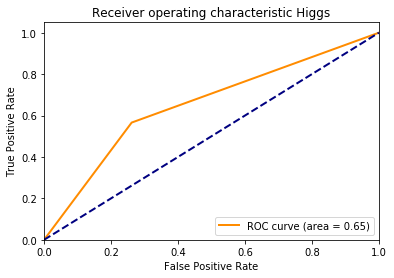

In [180]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Higgs')
plt.legend(loc="lower right")
plt.show()

In [181]:
Att_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 300)               8700      
_________________________________________________________________
dropout_16 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_98 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_99 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_100 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_101 (Dense)            (None, 1)               

In [182]:
history.history

{'loss': [0.6988053631472897,
  0.6729618001293827,
  0.6700219032052276,
  0.6680652878501199,
  0.6686523874084671,
  0.6673628440150967,
  0.6652503346467947,
  0.665189891666561,
  0.6660237606469687,
  0.6651811313319516,
  0.6647168483052935,
  0.6647767354915668,
  0.6632420219384231,
  0.6630454218232786,
  0.6639981989736681,
  0.663050314048668,
  0.6627510530608041,
  0.6621634627317453,
  0.6610848067642806,
  0.6624972549351779,
  0.6595791183508836,
  0.659564034505324,
  0.6591425499358734,
  0.6593509269999219,
  0.6572725184552082,
  0.6576365851736689,
  0.6567838308099029,
  0.6548877621625925,
  0.6541923106490791,
  0.6538002235548837,
  0.6537352746183221,
  0.651894020569789,
  0.6514623854067418,
  0.6494092012380625,
  0.6508492386186278,
  0.6499072173973183,
  0.6487365666922037,
  0.6480445768926051,
  0.6456331974500186,
  0.6472331564147751,
  0.6460090573731955,
  0.6438161366945737,
  0.6434759892426528,
  0.6411932033377808,
  0.6408245060350988,
  0.64

In [183]:
#%%time
#size_histories['Tiny3'], Tinypred3, Tinyvalres3 = compile_and_fit(tiny_model3, 'sizes/Tiny')

Note: All the above training runs used the `callbacks.EarlyStopping` to end the training once it was clear the model was not making progress.

## Recommendations for Improvements

- Try different activation functions, consider ReLU, others?
- Try different training/test split, 99% train vs 1% test – we would suggest more traditional 80% train vs 20% test
- Try Adam -- 

**Sigmoid activation** – S shape, logistic function, take any input and produce result between 0 and 1, cannot be used with many layers due to vanishing gradients, nonlinear activation function, large negatives become 0/large positives become 1, drawbacks – sigmoids saturate, kill gradients; sigmoid outputs are not 0-centered, 

**Softmax activation** – 

**ReLU activation** – rectified linear activation function, piecewise linear function that outputs the input directly if positive (otherwise, output 0). Default activation, easy train, better performance, activation is threshold at 0, can accelerate SGD, implemented by simply thresholding matrix of activations at 0, can be fragile where weights could update in a way for neuron to not activate again (Leaky ReLU attempts to fix dying problem)


## Conclusions

To recap: here are the most common ways to prevent overfitting in neural networks:

* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout.

Two important approaches not covered in this guide are:

* data-augmentation
* batch normalization

Remember that each method can help on its own, but often combining them can be even more effective.

## References
NW will add 

## NW Q: What do we need from below? This seemed like extraneous code.

## Demonstrate overfitting

The simplest way to prevent overfitting is to start with a small model: A model with a small number of learnable parameters (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity".

Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power, but this would be useless when making predictions on previously unseen data.

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it will not be able to learn the mapping as easily. To minimize its loss, it will have to learn compressed representations that have more predictive power. At the same time, if you make your model too small, it will have difficulty fitting to the training data. There is a balance between "too much capacity" and "not enough capacity".

Unfortunately, there is no magical formula to determine the right size or architecture of your model (in terms of the number of layers, or the right size for each layer). You will have to experiment using a series of different architectures.

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss.

Start with a simple model using only `layers.Dense` as a baseline, then create larger versions, and compare them.

### Training procedure

Many models train better if you gradually reduce the learning rate during training. Use `optimizers.schedules` to reduce the learning rate over time:

### View in TensorBoard

These models all wrote TensorBoard logs during training.

To open an embedded  TensorBoard viewer inside a notebook, copy the following into a code-cell:

```
%tensorboard --logdir {logdir}/sizes
```

You can view the [results of a previous run](https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97) of this notebook on [TensorBoard.dev](https://tensorboard.dev/).

TensorBoard.dev is a managed experience for hosting, tracking, and sharing ML experiments with everyone.

It's also included in an `<iframe>` for convenience:

In [184]:
display.IFrame(
    src="https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97",
    width="100%", height="800px")

If you want to share TensorBoard results you can upload the logs to [TensorBoard.dev](https://tensorboard.dev/) by copying the following into a code-cell.

Note: This step requires a Google account.

```
!tensorboard dev upload --logdir  {logdir}/sizes
```

Caution: This command does not terminate. It's designed to continuously upload the results of long-running experiments. Once your data is uploaded you need to stop it using the "interrupt execution" option in your notebook tool.